In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square
import math
from numpy.fft import fft, ifft, fftfreq

In [4]:
#50, 150 и 450 Гц.
def cosinus(t, frequency, amplitude):
    w1 = 50 * 2 * np.pi
    w2 = 150 * 2 * np.pi
    w3 = 450 * 2 * np.pi
    return (np.cos(w1 * t)  + np.cos(w2 * t)  + np.cos(w3 * t))

Text(0, 0.5, 'Амплитуда')

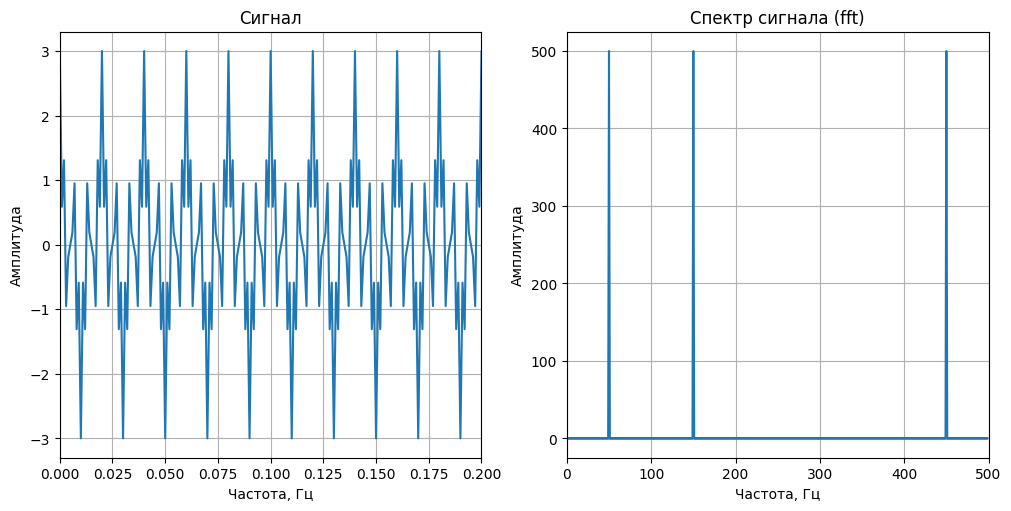

In [5]:

N = 600 # Количество отсчетов
fmax = 800 # максимальная частота
T = 1.0 / fmax
A = 4
sampling_rate = 1000  # Частота дискретизации (Гц)
duration = 1.0  # Продолжительность сигнала (секунды)
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)  # Временная шкала


x = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)  # Временная шкала
y = cosinus(x, frequency=50, amplitude=A)


xf = x
yf = cosinus(xf, frequency=50, amplitude=A)
y_fft = fft(yf)
fft_freqs =   fftfreq(len(yf), 1 / sampling_rate)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), layout="constrained")
axs[0].plot(x, y)
axs[0].grid()
axs[0].set_xlim(0, 0.2)
axs[0].set_title("Сигнал")
axs[0].set_xlabel('Частота, Гц')
axs[0].set_ylabel('Амплитуда')

axs[1].plot(fft_freqs, abs(y_fft))
axs[1].grid()
axs[1].set_xlim(0, 500)
axs[1].set_title("Спектр сигнала (fft)")
axs[1].set_xlabel('Частота, Гц')
axs[1].set_ylabel('Амплитуда')


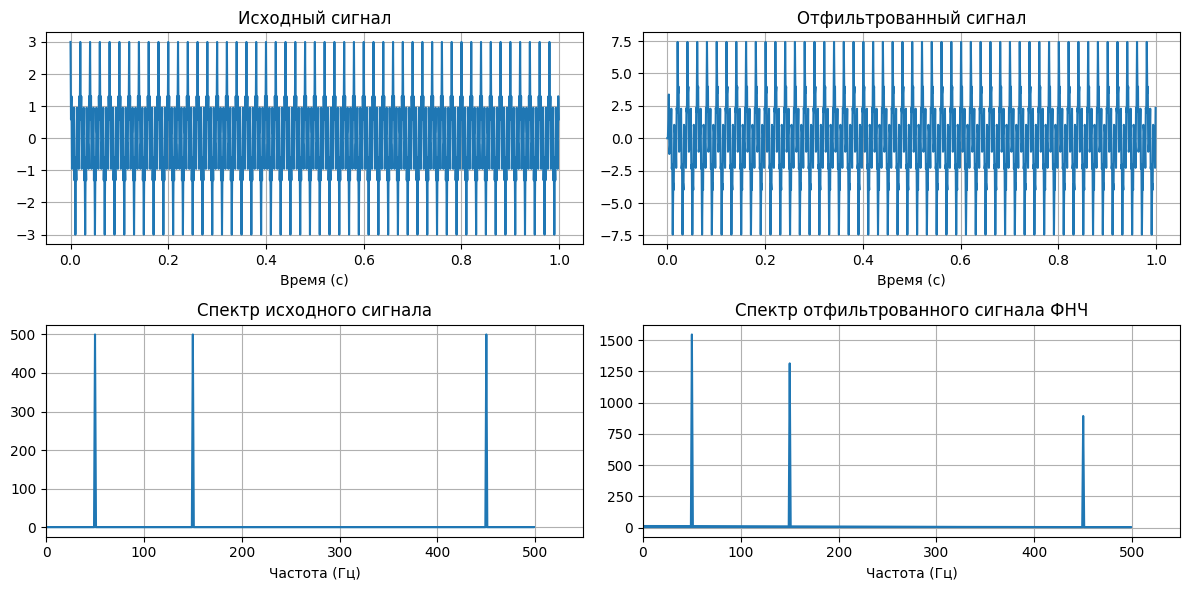

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Создание сигнала
fs = 1000  # Частота дискретизации (Гц)
t = np.arange(0, 1, 1/fs)  # Временная ось от 0 до 1 сек
signal_freqs = [50, 150, 450]  # Частоты сигнала (Гц)
signal = np.sum([np.cos(2 * np.pi * f * t) for f in signal_freqs], axis=0)

# Параметры фильтра
cutoff_freq = 100  # Частота среза фильтра (Гц)
order = 2  # Порядок фильтра

# Вычисление коэффициентов фильтра Баттерворта
def butterworth_filter(order, cutoff_freq, fs):
    nyquist_freq = 0.5 * fs
    omega_c = 2 * np.pi * cutoff_freq / nyquist_freq
    a = np.zeros(order + 1)
    b = np.zeros(order + 1)
    a[0] = 1.0
    b[0] = (omega_c**2) / ((2 * np.sin(omega_c/2))**2)
    b[1] = 2 * b[0]
    a[1] = 2 * (1 - (omega_c**2) / ((2 * np.sin(omega_c/2))**2))
    return a, b

a, b = butterworth_filter(order, cutoff_freq, fs)

# Фильтрация сигнала
filtered_signal = np.zeros_like(signal)
for n in range(order, len(signal)):
    for k in range(1, order + 1):
        filtered_signal[n] += b[k] * signal[n - k] - a[k] * filtered_signal[n - k]
        


# Вычисление спектра сигнала и отфильтрованного сигнала
signal_spectrum = np.fft.fft(signal)
filtered_signal_spectrum = np.fft.fft(filtered_signal)
frequencies = np.fft.fftfreq(len(t), 1/fs)

# Построение графиков
plt.figure(figsize=(12, 6))

# График исходного сигнала
plt.subplot(2, 2, 1)
plt.plot(t, signal)
plt.title('Исходный сигнал')
plt.xlabel('Время (с)')
plt.grid(True)

# График отфильтрованного сигнала
plt.subplot(2, 2, 2)
plt.plot(t, filtered_signal)
plt.title('Отфильтрованный сигнал')
plt.xlabel('Время (с)')
plt.grid(True)

# График спектра сигнала
plt.subplot(2, 2, 3)
plt.plot(frequencies, np.abs(signal_spectrum))
plt.title('Спектр исходного сигнала')
plt.xlabel('Частота (Гц)')
plt.xlim(0)
plt.grid(True)

# График спектра отфильтрованного сигнала
plt.subplot(2, 2, 4)
plt.plot(frequencies, np.abs(filtered_signal_spectrum))
plt.title('Спектр отфильтрованного сигнала ФНЧ')
plt.xlabel('Частота (Гц)')
plt.xlim(xmin=0)
plt.grid(True)

plt.tight_layout()
plt.show()


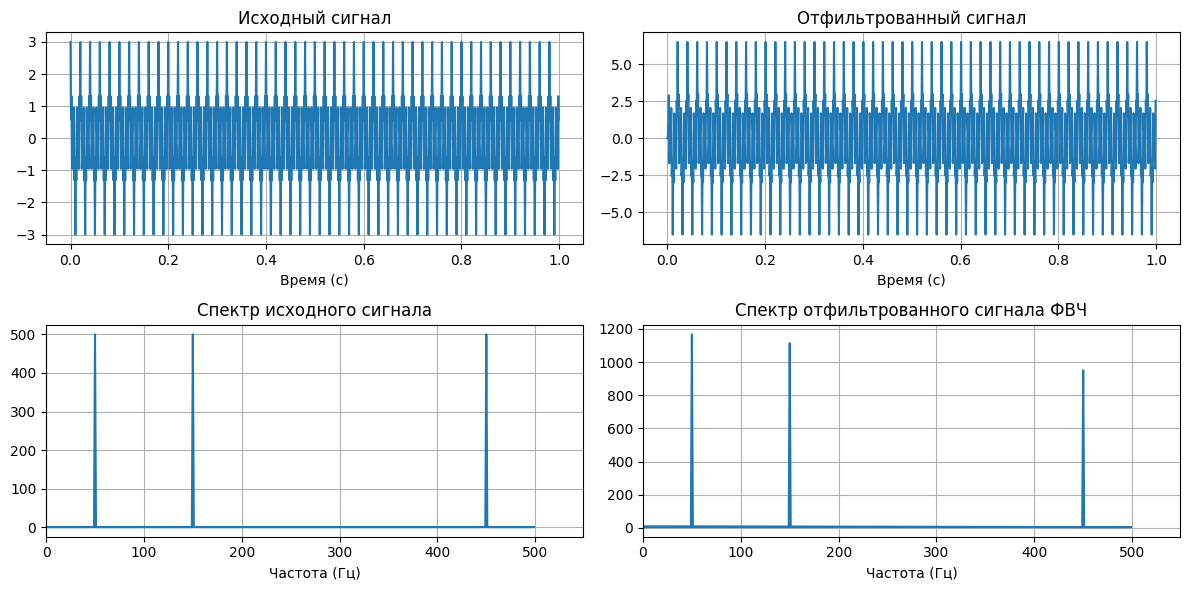

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Создание сигнала
fs = 1000  # Частота дискретизации (Гц)
t = np.arange(0, 1, 1/fs)  # Временная ось от 0 до 1 сек
signal_freqs = [50, 150, 450]  # Частоты сигнала (Гц)
signal = np.sum([np.cos(2 * np.pi * f * t) for f in signal_freqs], axis=0)

# Параметры фильтра
cutoff_freq = 100  # Частота среза фильтра (Гц)
order = 2  # Порядок фильтра

# Вычисление коэффициентов фильтра Баттерворта
def butterworth_filter(order, cutoff_freq, fs):
    nyquist_freq = 0.5 * fs
    omega_c = nyquist_freq/ (2 * np.pi * cutoff_freq)
    a = np.zeros(order + 1)
    b = np.zeros(order + 1)
    a[0] = 1.0
    b[0] = -(omega_c**2) / ((2 * np.sin(omega_c/2))**2)
    b[1] = -2 * b[0]
    a[1] = 2 * (1 - (omega_c**2) / ((2 * np.sin(omega_c/2))**2))
    return a, b

a, b = butterworth_filter(order, cutoff_freq, fs)

# Фильтрация сигнала
filtered_signal = np.zeros_like(signal)
for n in range(order, len(signal)):
    for k in range(1, order + 1):
        filtered_signal[n] += b[k] * signal[n - k] - a[k] * filtered_signal[n - k]

# Вычисление спектра сигнала и отфильтрованного сигнала
signal_spectrum = np.fft.fft(signal)
filtered_signal_spectrum = np.fft.fft(filtered_signal)
frequencies = np.fft.fftfreq(len(t), 1/fs)

# Построение графиков
plt.figure(figsize=(12, 6))

# График исходного сигнала
plt.subplot(2, 2, 1)
plt.plot(t, signal)
plt.title('Исходный сигнал')
plt.xlabel('Время (с)')
plt.grid(True)

# График отфильтрованного сигнала
plt.subplot(2, 2, 2)
plt.plot(t, filtered_signal)
plt.title('Отфильтрованный сигнал')
plt.xlabel('Время (с)')
plt.grid(True)

# График спектра сигнала
plt.subplot(2, 2, 3)
plt.plot(frequencies, np.abs(signal_spectrum))
plt.title('Спектр исходного сигнала')
plt.xlabel('Частота (Гц)')
plt.xlim(0)
plt.grid(True)

# График спектра отфильтрованного сигнала
plt.subplot(2, 2, 4)
plt.plot(frequencies, np.abs(filtered_signal_spectrum))
plt.title('Спектр отфильтрованного сигнала ФВЧ')
plt.xlabel('Частота (Гц)')
plt.xlim(0)
plt.grid(True)

plt.tight_layout()
plt.show()


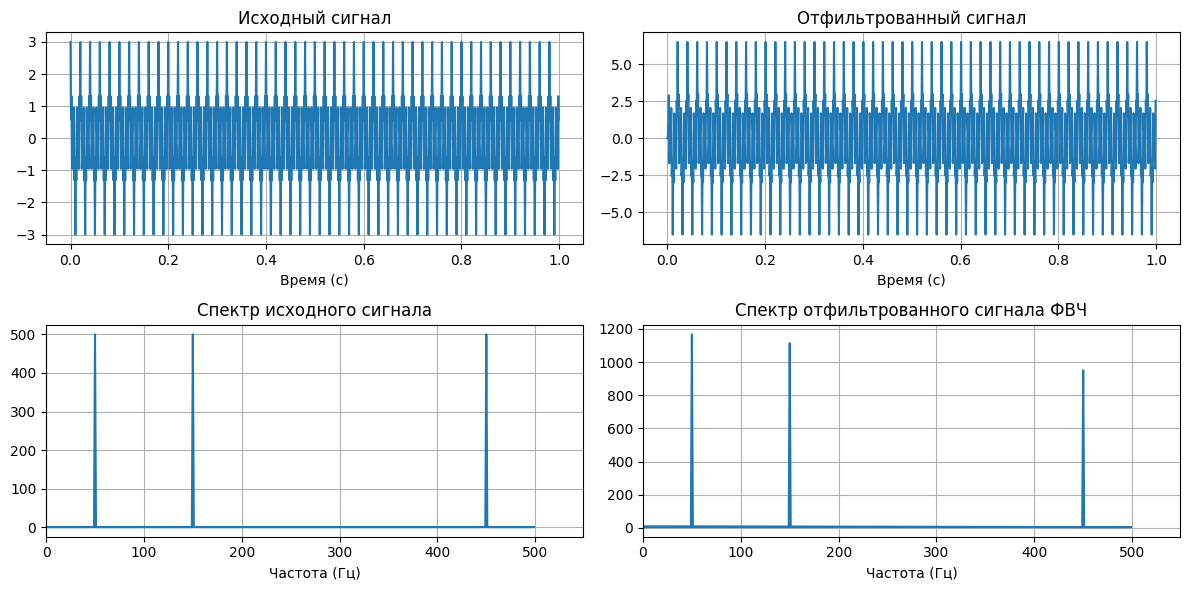

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Создание сигнала
fs = 1000  # Частота дискретизации (Гц)
t = np.arange(0, 1, 1/fs)  # Временная ось от 0 до 1 сек
signal_freqs = [50, 150, 450]  # Частоты сигнала (Гц)
signal = np.sum([np.cos(2 * np.pi * f * t) for f in signal_freqs], axis=0)

# Параметры фильтра
cutoff_freq = 100  # Частота среза фильтра (Гц)
order = 2  # Порядок фильтра

# Вычисление коэффициентов фильтра Баттерворта
def butterworth_filter(order, cutoff_freq, fs):
    nyquist_freq = 0.5 * fs
    omega_c = nyquist_freq/ (2 * np.pi * cutoff_freq)
    a = np.zeros(order + 1)
    b = np.zeros(order + 1)
    a[0] = 1.0
    b[0] = -(omega_c**2) / ((2 * np.sin(omega_c/2))**2)
    b[1] = -2 * b[0]
    a[1] = 2 * (1 - (omega_c**2) / ((2 * np.sin(omega_c/2))**2))
    return a, b

a, b = butterworth_filter(order, cutoff_freq, fs)

# Фильтрация сигнала
filtered_signal = np.zeros_like(signal)
for n in range(order, len(signal)):
    for k in range(1, order + 1):
        filtered_signal[n] += b[k] * signal[n - k] - a[k] * filtered_signal[n - k]

# Вычисление спектра сигнала и отфильтрованного сигнала
signal_spectrum = np.fft.fft(signal)
filtered_signal_spectrum = np.fft.fft(filtered_signal)
frequencies = np.fft.fftfreq(len(t), 1/fs)

# Построение графиков
plt.figure(figsize=(12, 6))

# График исходного сигнала
plt.subplot(2, 2, 1)
plt.plot(t, signal)
plt.title('Исходный сигнал')
plt.xlabel('Время (с)')
plt.grid(True)

# График отфильтрованного сигнала
plt.subplot(2, 2, 2)
plt.plot(t, filtered_signal)
plt.title('Отфильтрованный сигнал')
plt.xlabel('Время (с)')
plt.grid(True)

# График спектра сигнала
plt.subplot(2, 2, 3)
plt.plot(frequencies, np.abs(signal_spectrum))
plt.title('Спектр исходного сигнала')
plt.xlabel('Частота (Гц)')
plt.xlim(0)
plt.grid(True)

# График спектра отфильтрованного сигнала
plt.subplot(2, 2, 4)
plt.plot(frequencies, np.abs(filtered_signal_spectrum))
plt.title('Спектр отфильтрованного сигнала ФВЧ')
plt.xlabel('Частота (Гц)')
plt.xlim(0)
plt.grid(True)

plt.tight_layout()
plt.show()


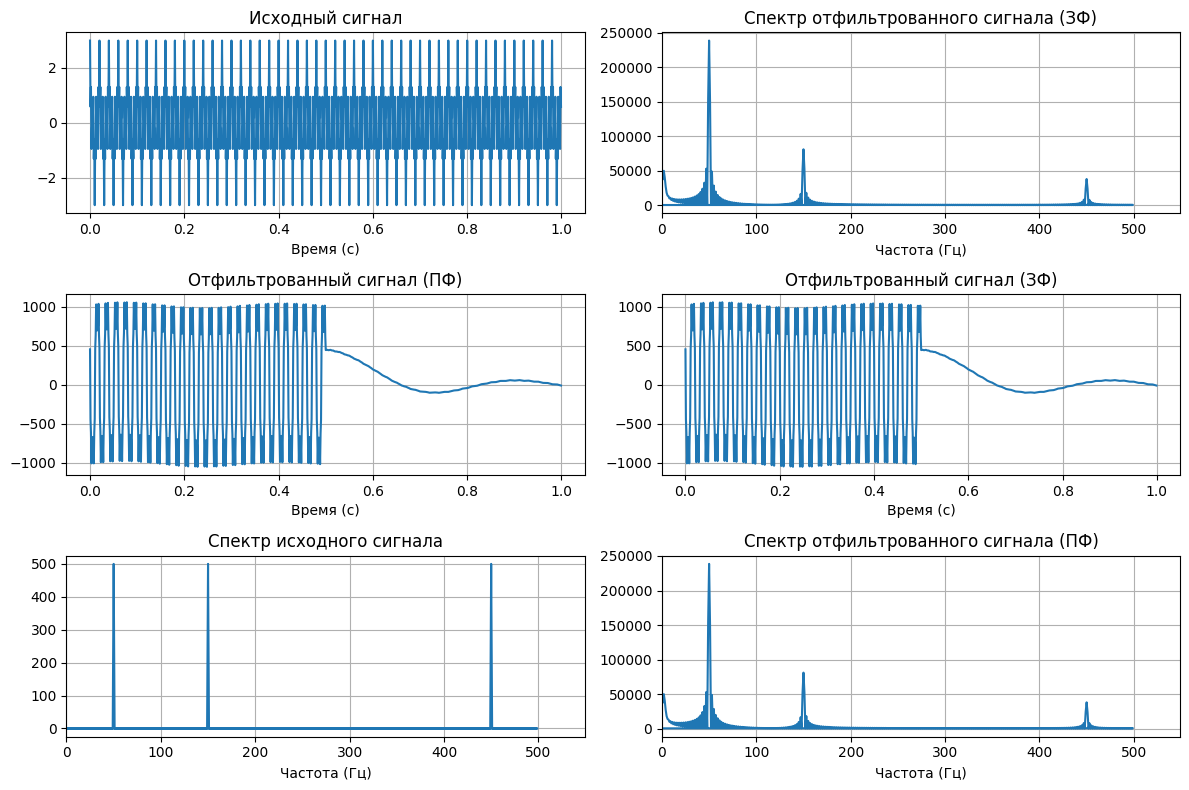

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Создание сигнала
fs = 1000  # Частота дискретизации (Гц)
t = np.arange(0, 1, 1/fs)  # Временная ось от 0 до 1 сек
signal_freqs = [50, 150, 450]  # Частоты сигнала (Гц)
signal1 = np.sum([np.cos(2 * np.pi * f * t) for f in signal_freqs], axis=0)

# Частота полосового фильтра (ПФ/ЗФ)
center_freq = 150  # Частота полосового фильтра (ПФ/ЗФ) (Гц)
bw = 20  # Ширина полосы (Гц)

# Создание полосового фильтра (ПФ)
def bandpass_filter(center_freq, bw, fs, t):
    delta = bw / fs
    a = np.sinc(2 * center_freq * t)
    b = 2 * center_freq * np.sinc(2 * center_freq * delta * t)
    return a - b

# Создание заграждающего фильтра (ЗФ)
def notch_filter(center_freq, bw, fs, t):
    delta = bw / fs
    a = np.sinc(2 * center_freq * t)
    b = 2 * center_freq * np.sinc(2 * center_freq * delta * t)
    return  (a - b)

# Применение полосового фильтра (ПФ)
filtered_signal_PF = np.convolve(signal1, bandpass_filter(center_freq, bw, fs, t), mode='same')

# Применение заграждающего фильтра (ЗФ)
filtered_signal_NF = np.convolve(signal1, notch_filter(center_freq, bw, fs, t), mode='same')

# Вычисление спектра сигнала и фильтров
signal_spectrum = np.fft.fft(signal1)
filtered_signal_spectrum_PF = np.fft.fft(filtered_signal_PF)
filtered_signal_spectrum_NF = np.fft.fft(filtered_signal_NF)
frequencies = np.fft.fftfreq(len(t), 1/fs)

# Построение графиков
plt.figure(figsize=(12, 8))

# График исходного сигнала
plt.subplot(3, 2, 1)
plt.plot(t, signal1)
plt.title('Исходный сигнал')
plt.xlabel('Время (с)')
plt.grid(True)

# График отфильтрованного сигнала (ПФ)
plt.subplot(3, 2, 3)
plt.plot(t, filtered_signal_PF)
plt.title('Отфильтрованный сигнал (ПФ)')
plt.xlabel('Время (с)')
plt.grid(True)

# График отфильтрованного сигнала (ЗФ)
plt.subplot(3, 2, 4)
plt.plot(t, filtered_signal_NF)
plt.title('Отфильтрованный сигнал (ЗФ)')
plt.xlabel('Время (с)')
plt.grid(True)

# График спектра сигнала
plt.subplot(3, 2, 5)
plt.plot(frequencies, np.abs(signal_spectrum))
plt.title('Спектр исходного сигнала')
plt.xlabel('Частота (Гц)')
plt.xlim(0)
plt.grid(True)

# График спектра отфильтрованного сигнала (ПФ)
plt.subplot(3, 2, 6)
plt.plot(frequencies, np.abs(filtered_signal_spectrum_PF))
plt.title('Спектр отфильтрованного сигнала (ПФ)')
plt.xlabel('Частота (Гц)')
plt.xlim(0)
plt.grid(True)

# График спектра отфильтрованного сигнала (ЗФ)
plt.subplot(3, 2, 2)
plt.plot(frequencies, np.abs(filtered_signal_spectrum_NF))
plt.title('Спектр отфильтрованного сигнала (ЗФ)')
plt.xlabel('Частота (Гц)')
plt.xlim(0)
plt.grid(True)

plt.tight_layout()
plt.show()


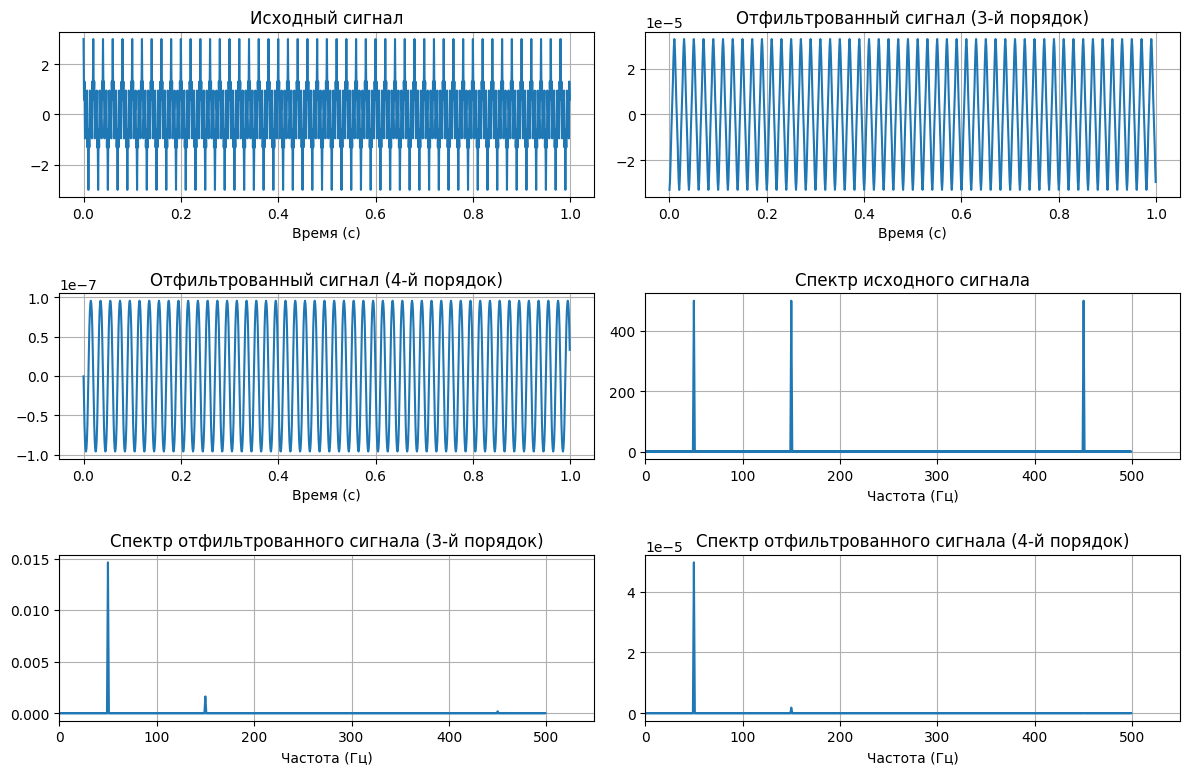

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Создание сигнала
fs = 1000  # Частота дискретизации (Гц)
t = np.arange(0, 1, 1/fs)  # Временная ось от 0 до 1 сек
signal_freqs = [50, 150, 450]  # Частоты сигнала (Гц)
signal1 = np.sum([np.cos(2 * np.pi * f * t) for f in signal_freqs], axis=0)

# Функция для расчета полюсов фильтра Баттерворта
def butterworth_poles(order, cutoff_freq, fs):
    nyquist_freq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist_freq
    poles = np.exp(1j * np.pi * (2 * np.arange(1, order + 1) - 1) / (2 * order))
    poles *= normal_cutoff / np.abs(poles)
    return poles

# Создание фильтра Баттерворта 3-го порядка
cutoff_freq = 150  # Частота среза фильтра (Гц)
order = 3  # Порядок фильтра
poles = butterworth_poles(order, cutoff_freq, fs)

# Применение фильтра Баттерворта 3-го порядка
filtered_signal_3rd_order = np.real(np.fft.ifft(np.fft.fft(signal1) / np.polyval(poles, 1j * 2 * np.pi * frequencies)))

# Создание фильтра Баттерворта 4-го порядка
order = 4  # Порядок фильтра
poles = butterworth_poles(order, cutoff_freq, fs)

# Применение фильтра Баттерворта 4-го порядка
filtered_signal_4th_order = np.real(np.fft.ifft(np.fft.fft(signal1) / np.polyval(poles, 1j * 2 * np.pi * frequencies)))

# Вычисление спектра сигнала и фильтров
signal_spectrum = np.fft.fft(signal1)
frequencies = np.fft.fftfreq(len(t), 1/fs)
filtered_signal_spectrum_3rd_order = np.fft.fft(filtered_signal_3rd_order)
filtered_signal_spectrum_4th_order = np.fft.fft(filtered_signal_4th_order)

# Построение графиков
plt.figure(figsize=(12, 8))

# График исходного сигнала
plt.subplot(3, 2, 1)
plt.plot(t, signal1)
plt.title('Исходный сигнал')
plt.xlabel('Время (с)')
plt.grid(True)

# График отфильтрованного сигнала (3-й порядок)
plt.subplot(3, 2, 2)
plt.plot(t, filtered_signal_3rd_order)
plt.title('Отфильтрованный сигнал (3-й порядок)')
plt.xlabel('Время (с)')
plt.grid(True)

# График отфильтрованного сигнала (4-й порядок)
plt.subplot(3, 2, 3)
plt.plot(t, filtered_signal_4th_order)
plt.title('Отфильтрованный сигнал (4-й порядок)')
plt.xlabel('Время (с)')
plt.grid(True)

# График спектра сигнала
plt.subplot(3, 2, 4)
plt.plot(frequencies, np.abs(signal_spectrum))
plt.title('Спектр исходного сигнала')
plt.xlabel('Частота (Гц)')
plt.xlim(0)
plt.grid(True)

# График спектра отфильтрованного сигнала (3-й порядок)
plt.subplot(3, 2, 5)
plt.plot(frequencies, np.abs(filtered_signal_spectrum_3rd_order))
plt.title('Спектр отфильтрованного сигнала (3-й порядок)')
plt.xlabel('Частота (Гц)')
plt.xlim(0)
plt.grid(True)
plt.subplot(3, 2, 6)
plt.plot(frequencies, np.abs(filtered_signal_spectrum_4th_order))
plt.title('Спектр отфильтрованного сигнала (4-й порядок)')
plt.xlim(0)
plt.xlabel('Частота (Гц)')

plt.grid(True)

plt.tight_layout()

plt.show()


In [20]:
def gauss_noise(signal):
    return signal + np.random.standard_normal(signal.shape) 

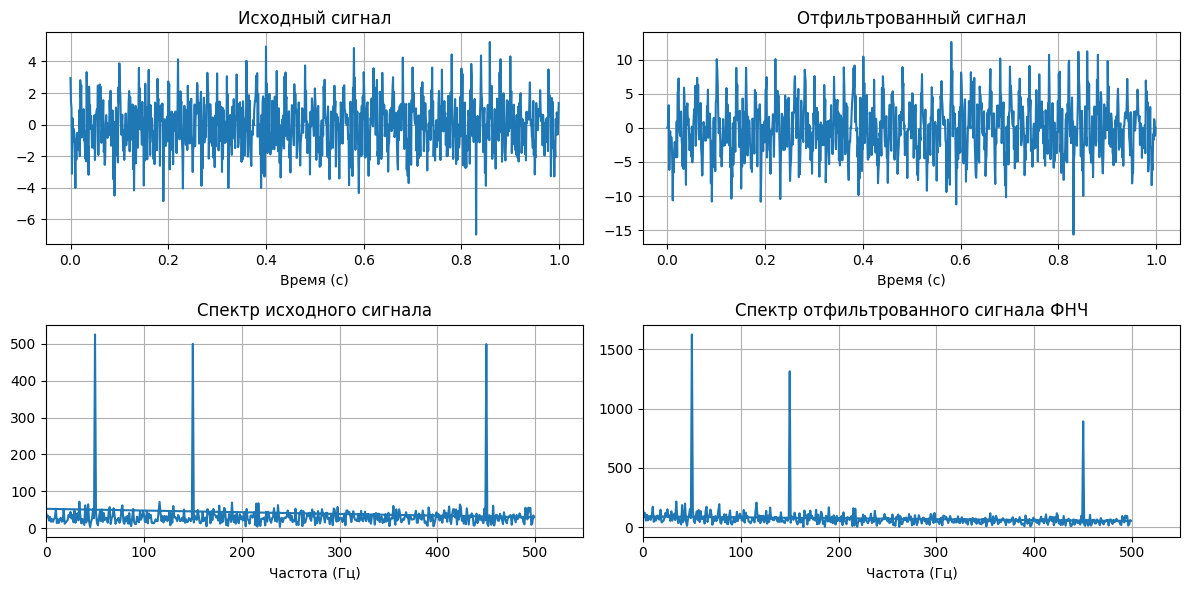

Text(0, 0.5, 'Амплитуда')

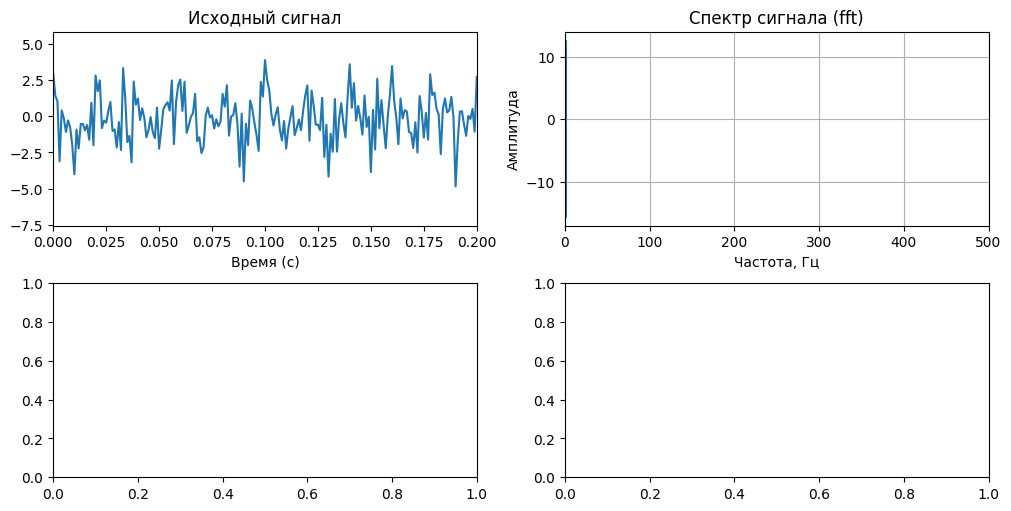

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Создание сигнала
fs = 1000  # Частота дискретизации (Гц)
t = np.arange(0, 1, 1/fs)  # Временная ось от 0 до 1 сек
signal_freqs = [50, 150, 450]  # Частоты сигнала (Гц)
signal =  gauss_noise(np.sum([np.cos(2 * np.pi * f * t) for f in signal_freqs], axis=0))

# Параметры фильтра
cutoff_freq = 100  # Частота среза фильтра (Гц)
order = 2  # Порядок фильтра

# Вычисление коэффициентов фильтра Баттерворта
def butterworth_filter(order, cutoff_freq, fs):
    nyquist_freq = 0.5 * fs
    omega_c = 2 * np.pi * cutoff_freq / nyquist_freq
    a = np.zeros(order + 1)
    b = np.zeros(order + 1)
    a[0] = 1.0
    b[0] = (omega_c**2) / ((2 * np.sin(omega_c/2))**2)
    b[1] = 2 * b[0]
    a[1] = 2 * (1 - (omega_c**2) / ((2 * np.sin(omega_c/2))**2))
    return a, b

a, b = butterworth_filter(order, cutoff_freq, fs)

# Фильтрация сигнала
filtered_signal = np.zeros_like(signal)
for n in range(order, len(signal)):
    for k in range(1, order + 1):
        filtered_signal[n] += b[k] * signal[n - k] - a[k] * filtered_signal[n - k]

# Вычисление спектра сигнала и отфильтрованного сигнала
signal_spectrum = np.fft.fft(signal)
filtered_signal_spectrum = np.fft.fft(filtered_signal)
frequencies = np.fft.fftfreq(len(t), 1/fs)

# Построение графиков
plt.figure(figsize=(12, 6))

# График исходного сигнала
plt.subplot(2, 2, 1)
plt.plot(t, signal)
plt.title('Исходный сигнал')
plt.xlabel('Время (с)')
plt.grid(True)

# График отфильтрованного сигнала
plt.subplot(2, 2, 2)
plt.plot(t, filtered_signal)
plt.title('Отфильтрованный сигнал')
plt.xlabel('Время (с)')
plt.grid(True)

# График спектра сигнала
plt.subplot(2, 2, 3)
plt.plot(frequencies, np.abs(signal_spectrum))

plt.title('Спектр исходного сигнала')

plt.xlabel('Частота (Гц)')
plt.xlim(0)
plt.grid(True)

# График спектра отфильтрованного сигнала
plt.subplot(2, 2, 4)
plt.plot(frequencies, np.abs(filtered_signal_spectrum))

plt.title('Спектр отфильтрованного сигнала ФНЧ')
plt.xlabel('Частота (Гц)')
plt.xlim(0)
plt.grid(True)

plt.tight_layout()
plt.show()



fig, axs = plt.subplots(2, 2, figsize=(10, 5), layout="constrained")
axs[0,0].plot(t, signal)
axs[0,0].grid()
axs[0,0].set_xlim(0, 0.2)
axs[0,0].set_title('Исходный сигнал')
axs[0,0].set_xlabel('Время (с)')
axs[0,0].grid()

axs[0,1].plot(t, filtered_signal)
axs[0,1].grid()
axs[0,1].set_xlim(0, 500)
axs[0,1].set_title("Спектр сигнала (fft)")
axs[0,1].set_xlabel('Частота, Гц')
axs[0,1].set_ylabel('Амплитуда')